In [1]:
import celldancer as cd
import anndata
import pandas as pd
import numpy as np
import scipy as sp
import os

In [2]:
adata = anndata.read_h5ad('../../data/emt_sim/emt_circuit_larger_noise.h5ad')

In [3]:
adata.layers['Mu']=adata.layers['unspliced']
adata.layers['Ms']=adata.layers['spliced']

In [4]:
df = cd.adata_to_df_with_embed(adata,
                               cell_type_para='leiden',
                               embed_para='X_umap')

100%|██████████| 9/9 [00:00<00:00, 51.77it/s]


In [6]:
df

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,E,1.540656,3.081312,1.845777,3.669658,1.061398,1.145108,1.065648,0.090156,0,1,15.620277,4.184258
1,1,E,1.551535,3.107223,1.857371,3.699711,1.067567,1.145882,1.065799,0.090156,1,1,15.112501,3.629900
2,2,E,1.542576,3.113228,1.845531,3.698480,1.060283,1.146330,1.066378,0.090156,2,1,14.704620,3.354680
3,3,E,1.552191,3.084278,1.860113,3.680435,1.069897,1.144957,1.065175,0.090156,3,1,14.319477,3.804783
4,4,E,1.555411,3.091423,1.863576,3.688881,1.071748,1.145166,1.065205,0.090156,4,1,13.948887,3.556432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,4995,Z,4.852009,2.912121,25.954605,3.411374,8.345662,4.844145,1.754258,0.201062,495-9,2,4.223013,-6.290294
34996,4996,Z,4.788514,2.904162,25.804369,3.384116,8.303907,4.840048,1.762925,0.201062,496-9,2,4.277530,-6.117205
34997,4997,Z,4.734488,2.875822,25.670927,3.343254,8.265871,4.833265,1.772675,0.201062,497-9,2,3.963720,-6.279521
34998,4998,Z,4.787140,2.849312,25.789886,3.338598,8.297670,4.831581,1.769081,0.201062,498-9,2,3.557932,-6.491060


In [7]:
df = cd.compute_cell_velocity(df)

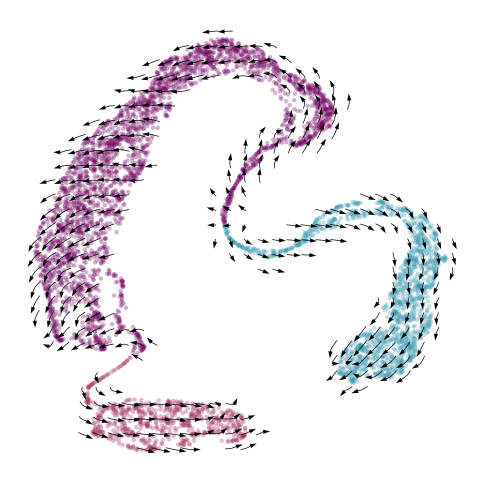

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6))
im = cd.cdplt.scatter_cell(ax,
                        df, 
                        colors=['0','1','2'], 
                        alpha=0.3, 
                        s=10,
                        velocity=True)
ax.axis('off')
plt.show()